In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import os
import argparse
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

from data import load_samples, data_generator


Number of test samples: 26000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━

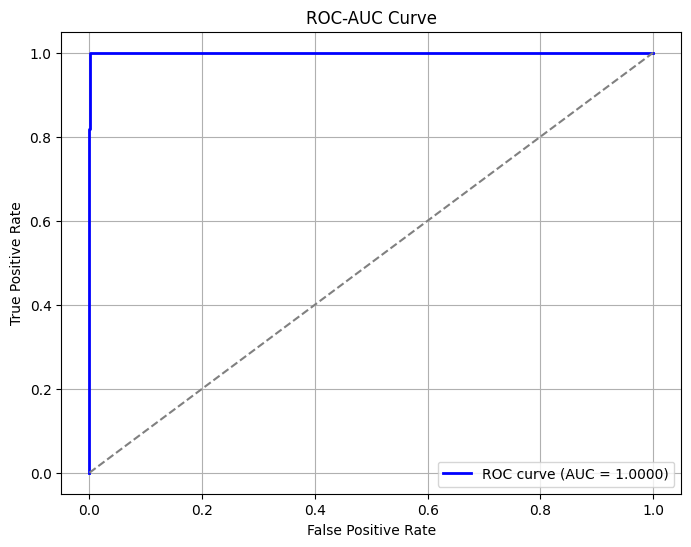

In [2]:

# Suppress TensorFlow logs
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
# def fft_layer(x):
#     x = tf.signal.fft2d(tf.cast(x, tf.complex64))
#     return tf.abs(x)

# Hyperparameters
batch_size = 32
img_size = 256
num_classes = 2



    # Load test data
test_data_path = "./csv/test.csv"    

test_samples = load_samples(test_data_path)

print(f"Number of test samples: {len(test_samples)}")

# Create test data generator
test_generator = data_generator(test_samples, batch_size=batch_size,  num_classes=num_classes)

# Load the trained model
model = tf.keras.models.load_model("./models/DM_NET_DCT_FINAL.keras")
# model = tf.keras.models.load_model("./models/DM_NET_DCT_FINAL.keras")

    # Predict on test set
y_true = []

y_pred_probs = []
    
for batch_x, batch_y in test_generator:
    y_true.extend(np.argmax(batch_y, axis=1))  # Convert one-hot labels to class indices
    y_pred_probs.extend(model.predict(batch_x))  # Get probability scores

    if len(y_true) >= len(test_samples):  # Stop when all samples are processed
        break

    # Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred_probs = np.array(y_pred_probs)[:, 1]  # Take probability of class 1 (FAKE)

    # Convert probabilities to binary predictions (threshold = 0.5)
y_pred = (y_pred_probs >= 0.5).astype(int)

    # Compute classification metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_probs)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

    # Plot ROC-AUC curve
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()





In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import os
import argparse
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

from data import load_samples, data_generator

# Suppress TensorFlow logs
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

# Hyperparameters
batch_size = 32
img_size = 256
num_classes = 2


    # Load test data
test_data_path = "./csv/test.csv"    

test_samples = load_samples(test_data_path)

print(f"Number of test samples: {len(test_samples)}")

# Create test data generator
test_generator = data_generator(test_samples, batch_size=batch_size, img_size=img_size, num_classes=num_classes)

# Load the trained model
model = tf.keras.models.load_model("./models/DM_NET2.keras")
model.evaluate(test_generator, steps=len(test_samples))

In [5]:
arr =np.load('/Users/srijit/Documents/Projects Personal/FREQUENCY/DM-Net/ps/test/deepfake/0_real/ffhq1.npy' )
print(arr.shape)
             

(224, 224, 3)
